In [20]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt

In [21]:
f = r.TFile("./newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root")
f.cd()
f.ls()

TFile**		./newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root	
 TFile*		./newPileupHists_gm2offline_ana_60h_pileup_corrected_only.root	
  KEY: TH3D	corrected;1	corrected


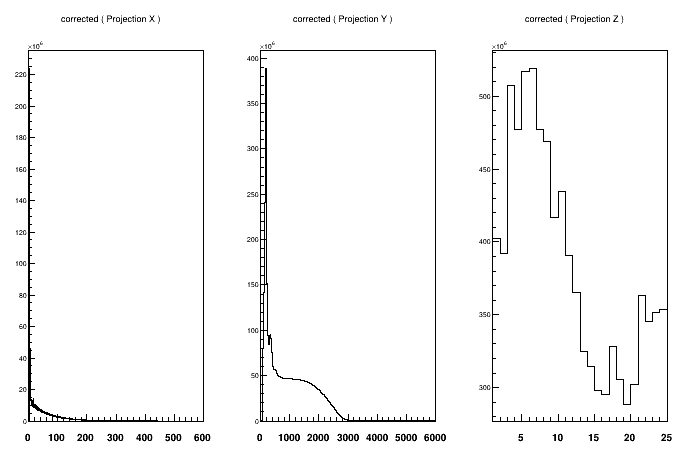

In [22]:
c = r.TCanvas()
c.Divide(3,1)
c.cd(1)
timehist = f.corrected.ProjectionX() #time (us)
timehist.Draw()
c.cd(2)
energyhist = f.corrected.ProjectionY() #energy (MeV)
energyhist.Draw()
c.cd(3)
calohist = f.corrected.ProjectionZ() # calonum
calohist.Draw()
c.Draw()

In [23]:
nbins = calohist.GetXaxis().GetNbins()
calolist = []
for i in range(0,nbins):
    ding = int(calohist.GetBinCenter(i) + calohist.GetBinWidth(i)/2)
    calolist.append(ding)
print(calolist)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


[<ROOT.TH1D object ("px_cut") at 0x7fffe3d92cf0>, <ROOT.TH1D object ("px_cut") at 0x7fffe3db60d0>, <ROOT.TH1D object ("px_cut") at 0x7fffe41a6b50>, <ROOT.TH1D object ("px_cut") at 0x7fffe3d96b10>, <ROOT.TH1D object ("px_cut") at 0x7fffe3dc1890>, <ROOT.TH1D object ("px_cut") at 0x7fffe3a93430>, <ROOT.TH1D object ("px_cut") at 0x7f98cc645600>, <ROOT.TH1D object ("px_cut") at 0x7f98cc499830>, <ROOT.TH1D object ("px_cut") at 0x7f98cc5d53e0>, <ROOT.TH1D object ("px_cut") at 0x7fffe3ed0fa0>, <ROOT.TH1D object ("px_cut") at 0x7fffe39e16d0>, <ROOT.TH1D object ("px_cut") at 0x7f98cc4b3690>, <ROOT.TH1D object ("px_cut") at 0x7fffe3dd4340>, <ROOT.TH1D object ("px_cut") at 0x7fffe35ed880>, <ROOT.TH1D object ("px_cut") at 0x7fffe3db0990>, <ROOT.TH1D object ("px_cut") at 0x7fffe3dc2b10>, <ROOT.TH1D object ("px_cut") at 0x7f98cc602150>, <ROOT.TH1D object ("px_cut") at 0x7f98cc5ab6a0>, <ROOT.TH1D object ("px_cut") at 0x7fffe45ce090>, <ROOT.TH1D object ("px_cut") at 0x7f98cc5ee070>, <ROOT.TH1D object (

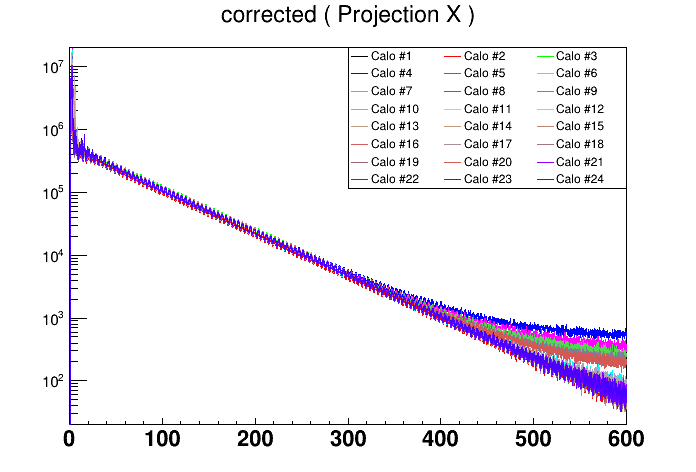

In [24]:
singleCaloEnergyList = []
c = r.TCanvas()
c.SetLogy()
leg = r.TLegend(0.5,0.6,0.9,0.9)
leg.SetNColumns(3)
for i in range(0,len(calolist)):
    h2 = f.corrected.ProjectionX("px_cut",0,-1,i+1,i+1,"")
    h2.SetLineColor(i+1)
    if i >= 4:
        h2.SetLineColor(2+i)
    if i>= 8:
        h2.SetLineColor(31+i)
    ding = h2.Clone()
    if i == 0:
        ding.Draw()
    else:
        ding.Draw("SAME")
    singleCaloEnergyList.append(ding)
print(singleCaloEnergyList)
for i in range(0,len(singleCaloEnergyList)):
    leg.AddEntry(singleCaloEnergyList[i],"Calo #" + str(calolist[i]),"l")
leg.Draw("SAME")
c.Draw()

In [25]:
for j in range(0,600,200):
    energylistj = []
    for i in range(0, len(singleCaloEnergyList)):
        energybin = singleCaloEnergyList[i].FindBin(j)
        ding = singleCaloEnergyList[i].GetBinContent(energybin)
        energylistj.append(ding)
#    print(energylistj)
    plt.plot(energylistj)
    plt.title(str(j)+" Microseconds")
    plt.ylabel('# of Counts')
    plt.xlabel('Calorimeter Number - 1')
#    plt.show()
    plt.savefig('./caloEnergyTime/'+str(format(j,'0>3'))+'_noCut.png', bbox_inches='tight')
    plt.close()

In [26]:
print(energylistj)

[1226.0310276142197, 981.0197407101095, 1273.0333181384187, 1708.059558854674, 1494.0455548255386, 1202.0295028249739, 1463.0438194982146, 1204.0295053254501, 1256.0322140917342, 1312.0353093519043, 1095.0243969687976, 1165.0277572806717, 1149.0274916998417, 1206.0296099031161, 1103.0247395771198, 1184.0282195824693, 1128.0259673330143, 1249.0320444257345, 1201.0293950834584, 1381.040000660581, 1183.0286766545541, 1103.0252485780982, 1194.0289300596264, 1207.0302073594764]


Now lets look at what happens when we introduce an energy cut into the mix.

101 201
[<ROOT.TH1D object ("px_cut") at 0x7fffe3dd14b0>, <ROOT.TH1D object ("px_cut") at 0x7f98cc0e0a30>, <ROOT.TH1D object ("px_cut") at 0x7f98cbd747c0>, <ROOT.TH1D object ("px_cut") at 0x7f98cbd74bb0>, <ROOT.TH1D object ("px_cut") at 0x7f98cc0c7850>, <ROOT.TH1D object ("px_cut") at 0x7f98cc0c7c40>, <ROOT.TH1D object ("px_cut") at 0x7f98cc0c8030>, <ROOT.TH1D object ("px_cut") at 0x7f98cc0c62d0>, <ROOT.TH1D object ("px_cut") at 0x7f98cc0c66c0>, <ROOT.TH1D object ("px_cut") at 0x7f98cc0c6ab0>, <ROOT.TH1D object ("px_cut") at 0x7f98cbd71030>, <ROOT.TH1D object ("px_cut") at 0x7f98cbd71420>, <ROOT.TH1D object ("px_cut") at 0x7f98cbd71810>, <ROOT.TH1D object ("px_cut") at 0x7f98cbd71c00>, <ROOT.TH1D object ("px_cut") at 0x7f98cbd71ff0>, <ROOT.TH1D object ("px_cut") at 0x7f98cbd723e0>, <ROOT.TH1D object ("px_cut") at 0x7f98cbd727d0>, <ROOT.TH1D object ("px_cut") at 0x7f98cbd72bc0>, <ROOT.TH1D object ("px_cut") at 0x7f98cbd67f30>, <ROOT.TH1D object ("px_cut") at 0x7f98cbd68320>, <ROOT.TH1D 

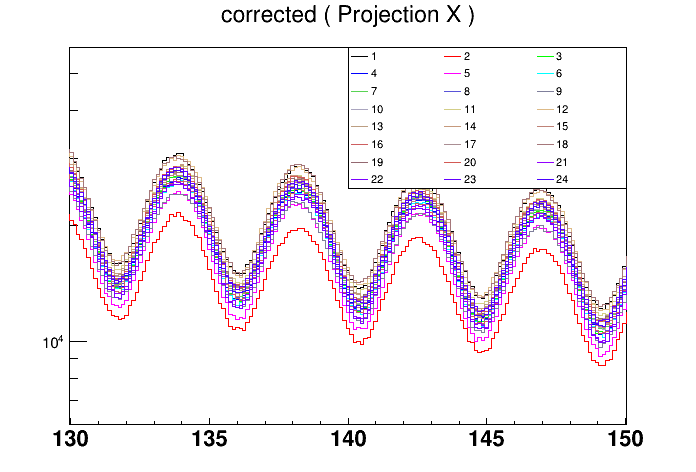

In [27]:
minenergybin = energyhist.FindBin(1500) #try switching from 1000 -> 1500 
maxenergybin = energyhist.FindBin(3000)
print(minenergybin,maxenergybin)

singleCaloEnergyCutList = []
c = r.TCanvas()
c.SetLogy()
leg = r.TLegend(0.5,0.6,0.9,0.9)
leg.SetNColumns(3)
for i in range(0,len(calolist)):
    h2 = f.corrected.ProjectionX("px_cut",minenergybin,maxenergybin,i+1,i+1,"")
    h2.SetLineColor(i+1)
    if i >= 4:
        h2.SetLineColor(2+i)
    if i>= 8:
        h2.SetLineColor(31+i)
    ding = h2.Clone()
    if i == 0:
        ding.GetXaxis().SetRangeUser(130,150)
        ding.Draw()
    else:
        ding.Draw("SAME")
    singleCaloEnergyCutList.append(ding)
print(singleCaloEnergyCutList)
for i in range(0,len(singleCaloEnergyCutList)):
    leg.AddEntry(singleCaloEnergyCutList[i],str(calolist[i]),"l")
leg.Draw("SAME")
c.Draw()

[20209.678905007873, 14442.940336603118, 18085.19891501191, 18064.122134035057, 16423.089461961496, 17424.242274368444, 18439.452373768003, 17692.163124523897, 16514.36485246352, 18505.633699449227, 19537.46628291465, 20496.9400795204, 19238.656270248903, 19299.454043195175, 18318.89211872675, 17287.58705360764, 18482.647667475474, 20402.677849370782, 18501.284560395026, 18720.805634717202, 17417.514460925944, 17063.416333861405, 18808.14063621089, 18166.79499707364]


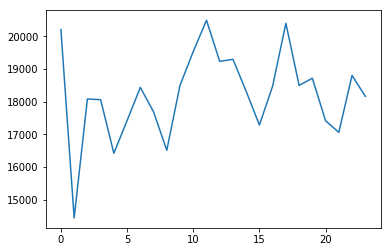

In [28]:
caloOscList = []
for i in range(0,len(calolist)):
    energyBin137 = singleCaloEnergyCutList[i].FindBin(137)
    caloOscList.append(singleCaloEnergyCutList[i].GetBinContent(energyBin137))
print(caloOscList)
plt.plot(caloOscList)
plt.show()

In [29]:
for j in range(0,600,200):
    energylistj = []
    for i in range(0, len(singleCaloEnergyCutList)):
        energybin = singleCaloEnergyCutList[i].FindBin(j)
        ding = singleCaloEnergyCutList[i].GetBinContent(energybin)
        energylistj.append(ding)
    plt.plot(energylistj)
    plt.title(str(j)+" Microseconds")
    plt.ylabel('# of Counts')
    plt.xlabel('Calorimeter Number - 1')
#    plt.show()
    plt.savefig('./caloEnergyTime/'+str(format(j,'0>3'))+'_cut.png', bbox_inches='tight')
    plt.close()

Now we can create a comparison plot which shows the cut and uncut plots side by side

In [30]:
for j in range(0,600,2):
    energylistj = []
    energylistjuncut = []
    for i in range(0, len(singleCaloEnergyCutList)):
        energybin = singleCaloEnergyCutList[i].FindBin(j)
        ding = singleCaloEnergyCutList[i].GetBinContent(energybin)
        energylistj.append(ding)
    for i in range(0,len(singleCaloEnergyList)):
        energybin = singleCaloEnergyList[i].FindBin(j)
        ding = singleCaloEnergyList[i].GetBinContent(energybin)
        energylistjuncut.append(ding)
    plt.plot(energylistj)
    plt.plot(energylistjuncut,linestyle='dashed')
#    print(energylistjuncut)
#    print(energylistj)
    plt.title(str(j)+" Microseconds")
    plt.ylabel('# of Counts')
    plt.xlabel('Calorimeter Number - 1')
#    plt.show()
    plt.savefig('./caloEnergyTime/'+str(format(j,'0>3'))+'_combined.png', bbox_inches='tight')
    plt.close()
    if (i % 100 == 0):
        print("Time",i,"processed")

We can't see much difference on the plots. Lets now look into the actual difference between these two plots by subtracting them directly

In [31]:
differencelist = []
for j in range(50,600,200):
    print("j = ",j)
    energylistj = []
    energylistjuncut = []
    #three loops is a stupid way to do this... fix at some point
    for i in range(0, len(singleCaloEnergyCutList)):
        energybin = singleCaloEnergyCutList[i].FindBin(j)
        ding = singleCaloEnergyCutList[i].GetBinContent(energybin)
        energylistj.append(ding)
    for i in range(0, len(singleCaloEnergyList)):
        energybin = singleCaloEnergyList[i].FindBin(j)
        ding = singleCaloEnergyList[i].GetBinContent(energybin)
        energylistjuncut.append(ding)
    differencelistj = []
    for i in range(0,len(singleCaloEnergyList)):
        differencelistj.append(energylistjuncut[i] - energylistj[i])
    differencelist.append(differencelistj)
    print(differencelistj)

j =  50
[173492.65682347727, 162855.28766156445, 192270.73665143727, 181231.82530842428, 179656.49261864318, 174925.58821444795, 174794.0394774091, 175508.70532843142, 168486.3384104799, 177359.82542411267, 158682.60350109445, 159255.4313660509, 155708.31448285852, 160543.74291912693, 160012.47197533725, 164928.44599034093, 157067.67089982552, 151983.23460156954, 156122.28713937203, 160858.21810119593, 164859.25883580704, 166990.66883630928, 164635.50617577435, 173936.33251704724]
j =  250
[7329.077201017679, 6935.765006666078, 7674.216195519979, 7939.305477165779, 7580.113952902997, 7293.018506295111, 7224.976441286483, 7414.086012911555, 7387.995872800982, 7844.315018373714, 7052.907441751131, 7053.921832058316, 7101.949418256798, 7225.969630116793, 7330.023027991111, 7505.063854623824, 7276.988137016999, 7065.9150704741605, 7092.89303598187, 7560.196862745612, 7386.042713491232, 7254.008593658888, 7059.894449981035, 7597.178423301697]
j =  450
[337.0042367453982, 367.0048215567699, 

Well apparantly there is no difference... Not sure if I believe that. This is a problem with the projection cut most likely. The difference does appear for weird cuts (say only energies from 1 - 3 MeV) however.



We can also look at the 2D histogram of the energy spectrum vs. time. Lets first do the projection for all calorimeters at once.

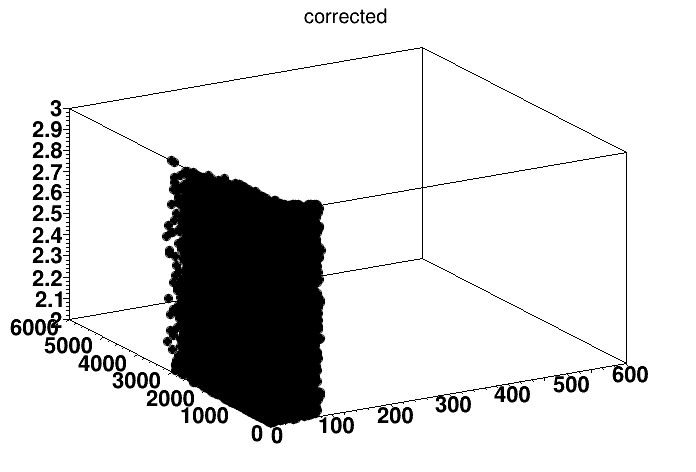

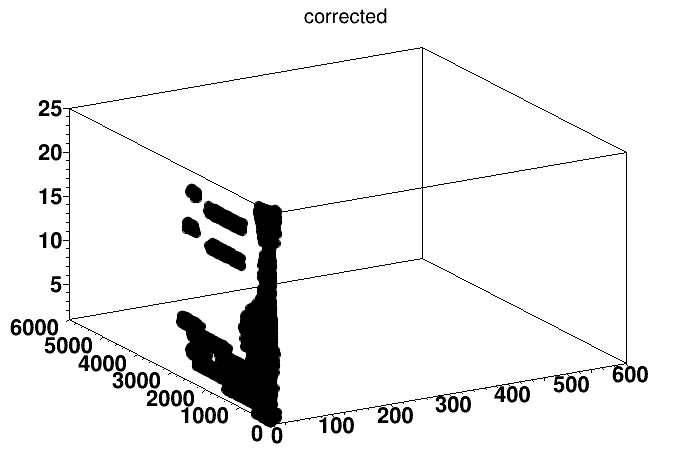

In [32]:
threedhist = f.corrected.Clone()
c = r.TCanvas()
threedhist.GetZaxis().SetRange(2,2)
threedhist.Draw()
c.Draw()
c2 = r.TCanvas()
f.corrected.Draw()
c2.Draw()

In [33]:
energytimehistFULL = f.corrected.Project3D("yx")

threedhist.GetZaxis().SetRange(2,2)
energytimehist = threedhist.Project3D("yx")

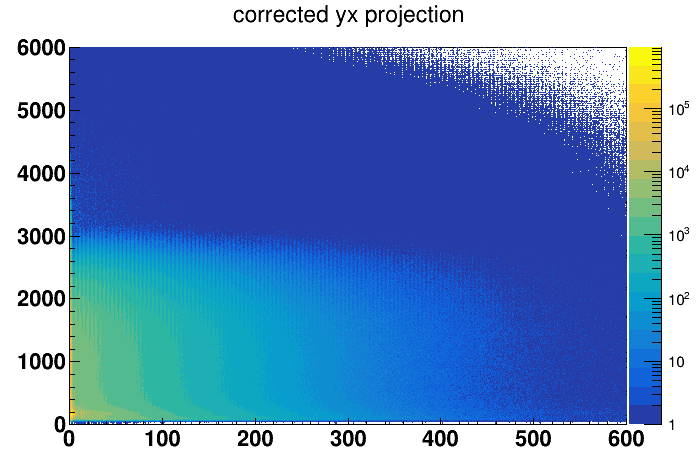

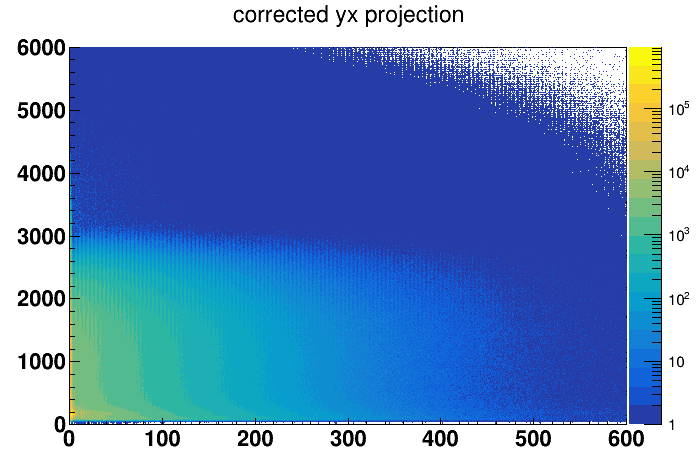

In [34]:
c2 = r.TCanvas()
energytimehist.Draw("COLZ")
c2.SetLogz()
#energytimehist.GetXaxis().SetRangeUser(0,50)
c2.Draw()
c3 = r.TCanvas()
energytimehistFULL.Draw("COLZ")
#energytimehistFULL.GetXaxis().SetRangeUser(0,50)
c3.SetLogz()
c3.Draw()

<ROOT.TH2D object ("corrected_yx") at 0x7f98d0b410e0> <ROOT.TH2D object ("corrected_yx") at 0x7f98d0b53c80>


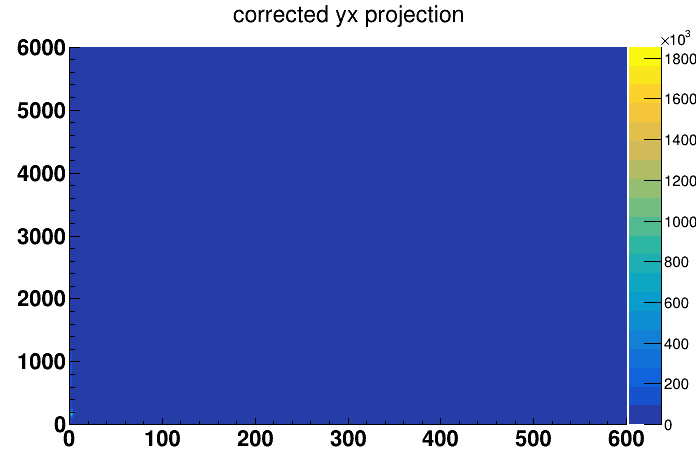

In [35]:
c4 = r.TCanvas()
ding = energytimehistFULL.Clone()
dong = energytimehist.Clone()
ding.Draw("goff")
dong.Draw("goff")
print(ding,dong)
ding.Add(dong,r.Double(1)) #change to -1 whenever the stupid error above is taken care of
ding.Draw("COLZ")
#c4.SetLogz()
c4.Draw()

Now isn't that one pretty. Lets take a closer look calorimeter by calorimeter and see if we can't identify the differences between calo 1 and the others.

In [36]:
print(energytimehist.GetNbinsX())
print(energytimehist.GetNbinsY())

4811
400


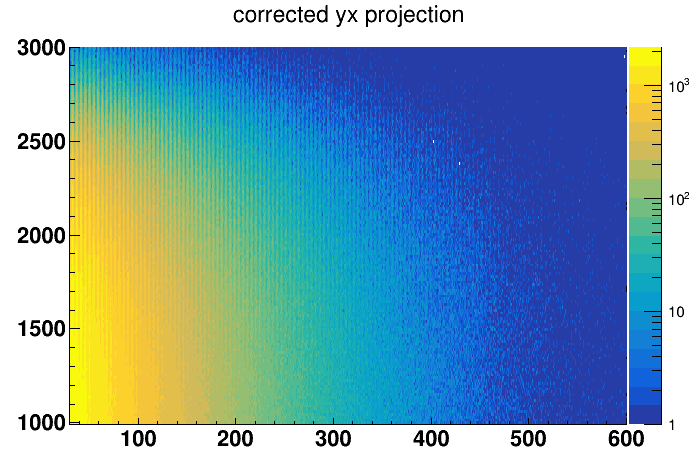

In [37]:
energytimehist.GetYaxis().SetRangeUser(1000,3000)
energytimehist.GetXaxis().SetRangeUser(30,600)
energytimehist.Draw("COLZ")
c2.Draw()

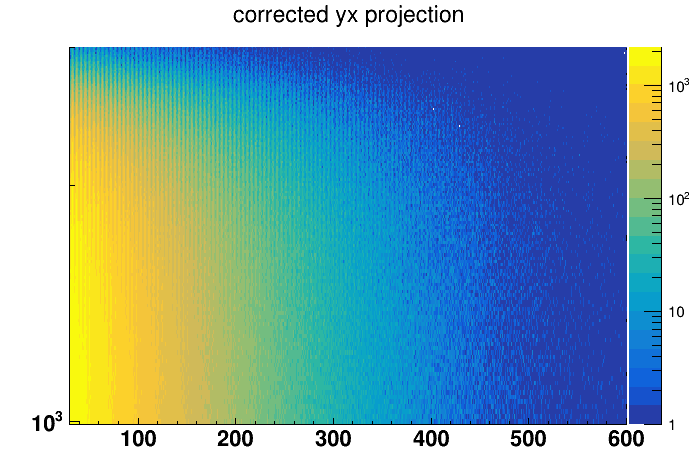

In [38]:
energyhistproj = energytimehist.ProjectionX()
energyhistproj.Draw()
energyhistproj.GetXaxis().SetRangeUser(30,100)
c2.SetLogy()
c2.Draw()